In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('placement.csv')
df.head() #TO see the output
X=df.iloc[:,0:2]#selected all rows and first and second columns 
Y=df.iloc[:,-1] #selected all rows and last column
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1)


In [11]:
X_train

,Unnamed: 0,cgpa
37,37,8.1
51,51,4.8
49,49,5.4
30,30,7.6
38,38,6.5
...,...,...
81,81,5.4
33,33,6.0
80,80,4.9
71,71,6.1


In [12]:
x_test

,Unnamed: 0,cgpa
52,52,7.0
97,97,6.7
40,40,4.9
64,64,7.0
31,31,3.9
4,4,5.8
62,62,6.0
27,27,6.0
21,21,7.1
93,93,6.8


In [13]:
y_train

37    1
51    0
49    0
30    1
38    1
     ..
81    0
33    0
80    0
71    1
65    1
Name: placement, Length: 90, dtype: int64

In [14]:
y_test

52    1
97    1
40    0
64    1
31    0
4     0
62    0
27    1
21    1
93    1
Name: placement, dtype: int64

In [15]:
#we can see that from x_train that student 74 have 
# gpa 6.7 and from y_train that student 74 got the
# placement representing by 1.


In [16]:
#then we will do scaling 
from sklearn.preprocessing import StandardScaler #preprocessing is a class so we need to make an object
scaler=StandardScaler() #scaler is the object
X_train=scaler.fit_transform(X_train)#this function will transform the x_train intro scaler and store it in the x_train again
X_train

array([[-0.43460352,  1.84315864],
       [ 0.05042787, -1.02140502],
       [-0.01886233, -0.50057527],
       [-0.67711922,  1.40913384],
       [-0.39995843,  0.45427929],
       [ 0.88191025, -1.02140502],
       [-1.6125369 ,  1.23552393],
       [-0.88498982, -1.10820998],
       [-0.74640942, -0.67418519],
       [ 0.36223376,  0.80149913],
       [-1.5432467 ,  0.97510905],
       [ 0.11971807,  2.01676856],
       [ 0.98584555,  0.10705945],
       [-0.19208783,  1.32232888],
       [-0.08815253, -0.67418519],
       [ 1.02049065,  0.45427929],
       [ 0.95120045,  1.14871897],
       [ 0.70868476,  0.28066937],
       [ 1.33229654, -1.36862486],
       [ 0.77797495,  1.14871897],
       [ 0.39687886,  1.14871897],
       [ 0.91655535, -0.93460007],
       [ 1.40158674,  1.14871897],
       [-1.37002121,  0.02025449],
       [-0.50389372,  0.71469417],
       [ 0.22365336,  0.10705945],
       [-1.26608591,  0.36747433],
       [-1.23144081,  0.10705945],
       [ 1.19371615,

In [17]:
x_test=scaler.fit_transform(x_test)#this function will transform the x_train intro scaler and store it in the x_train again
x_test

array([[ 0.10041337,  0.88640526],
       [ 1.65855186,  0.58422165],
       [-0.31509023, -1.22888002],
       [ 0.51591697,  0.88640526],
       [-0.62671793, -2.23615873],
       [-1.56160102, -0.32232919],
       [ 0.44666637, -0.12087344],
       [-0.76521913, -0.12087344],
       [-0.97297093,  0.98713313],
       [ 1.52005066,  0.68494952]])

In [18]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression() # object
#fit is use to train the data and we need to pass the training data
#model training
clf.fit(X_train,y_train)


LogisticRegression()

In [19]:
#model evaluation
y_pred=clf.predict(x_test)
#predict= it helps to predict what will be the answer of the x_test values.it predicts just
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1])

In [20]:
y_test
#we can see the actual result of the x_test from y_test.

52    1
97    1
40    0
64    1
31    0
4     0
62    0
27    1
21    1
93    1
Name: placement, dtype: int64

In [21]:
#we will now compare the result side by side
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)#(orginal result,predicted result)
# it will only work if y_text and y_pred is in same size

0.9

In [22]:
#the accuracy is 80%

<Axes: >

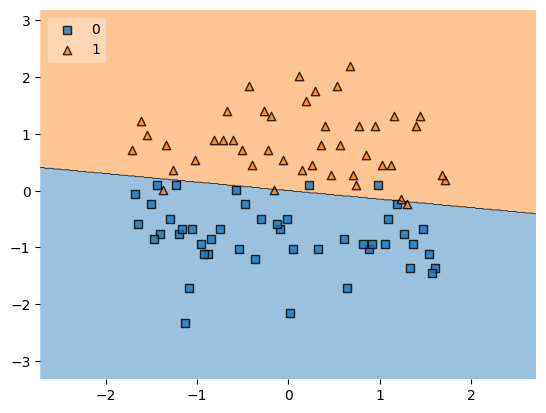

In [23]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,y_train.values,clf=clf,legend=2)

In [25]:
#we will use "pickle" which is a library that converts the data into file
import pickle
pickle.dump(clf,open('model.pkl','wb'))#file name model.pkl and will give write binary mode

